# Accessing data with CliMetLab

Here are a few examples on how to get data into python using CliMetLab.

More examples can be found in the CliMetLab documentation (https://climetlab.readthedocs.io/en/latest/examples.html).

## Loading various sources

A source is a "something providing data". It needs some parameters to define the actual location of the data. For instance, a source and be a URL, a remote or local server, a database, or a file, etc.

Below are a few examples of using ``cml.load_source()``.

Notice how: 
- The API to retrieve the data is similar.
- Credentials are requested if needed with appropriate help message, then saved locally.
- Data is provided as pandas.Dataframe or xarray.Dataset.

Let's download a some files for the examples:


In [ ]:
!test -f test.grib || wget https://github.com/ecmwf/climetlab/raw/main/docs/examples/test.grib
!test -f test.nc || wget https://github.com/ecmwf/climetlab/raw/main/docs/examples/test.nc
!test -f temp.bufr || wget http://download.ecmwf.int/test-data/metview/gallery/temp.bufr

In [17]:
import climetlab as cml
import numpy as np
cml.__version__

'0.13.11'

How to read data from a GRIB__version__:

In [ ]:
ds = cml.load_source('file', 'test.grib')
for field in ds:
	cml.plot_map(field)
ds.to_xarray()

How to read data from a netCDF file:

In [ ]:
ds = cml.load_source('file', 'test.nc')
for field in ds:
	cml.plot_map(field)
ds.to_xarray()

How to read data from a BUFR file:

In [ ]:
ds = cml.load_source('file', 'temp.bufr')
df = ds.to_pandas(
    columns=(
        "stationNumber",
        "latitude",
        "longitude",
        "data_datetime",
        "pressure",
        "airTemperature",
    ),
    filters={},
)
cml.plot_map(df, projection="global")
df

The purpose of the "file" source is to open **any** file, CliMetLab guess what type of file is provided.

## Reading from a URL `cml.load_source("url", URL)`

How to read data from a GRIB URL (using the climetlab source "url")

In [ ]:
ds = cml.load_source('url', 'https://github.com/ecmwf/climetlab/raw/main/docs/examples/test.grib')
for field in ds:
	cml.plot_map(field)
ds.to_xarray()

In [ ]:
cml.load_source('url', 'https://github.com/ecmwf/climetlab/raw/main/docs/examples/test.nc')
cml.load_source('url', 'http://download.ecmwf.int/test-data/metview/gallery/temp.bufr')

In [ ]:
# Downloading 32M of data.
URL = "https://www.ncei.noaa.gov/data/international-best-track-archive-for-climate-stewardship-ibtracs/v04r00/access/csv/ibtracs.SP.list.v04r00.csv"
data = cml.load_source("url", URL)
pd = data.to_pandas()

In [ ]:
uma = pd[pd.NAME == "UMA:VELI"]
cml.plot_map(uma, style="cyclone-track")

As shown below, data can be read from different sources, the API is similar: "load_source" with keywords to specify the data requested.

c:\users\frei_p\onedrive - alpiq.com\ecmwf_mooc_ml\github_code\mooc-machine-learning-weather-climate\venv\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


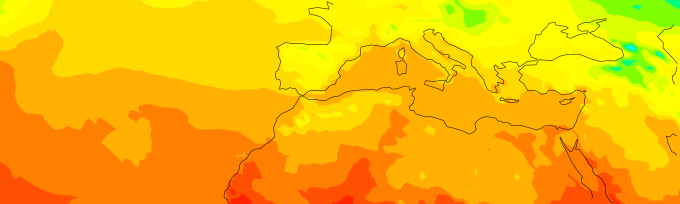

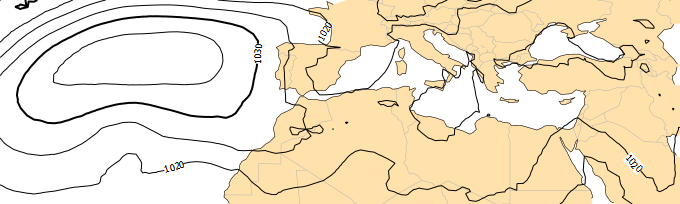

In [3]:
source = cml.load_source(
    "cds",
    "reanalysis-era5-single-levels",
    variable=["2t", "msl"],
    product_type="reanalysis",
    area=[50, -50, 20, 50],
    date="2011-12-02", # ["2011-12-02", "2011-12-03"] for several dates
    time="12:00",
)
for s in source:
    cml.plot_map(s)

In [ ]:
source = cml.load_source(
    "mars",
    param=["2t", "msl"],
    levtype="sfc",
    area=[50, -50, 20, 50],
    grid=[1, 1],
    date="2011-12-02",
    
)
for s in source:
    cml.plot_map(s)
source.to_xarray()

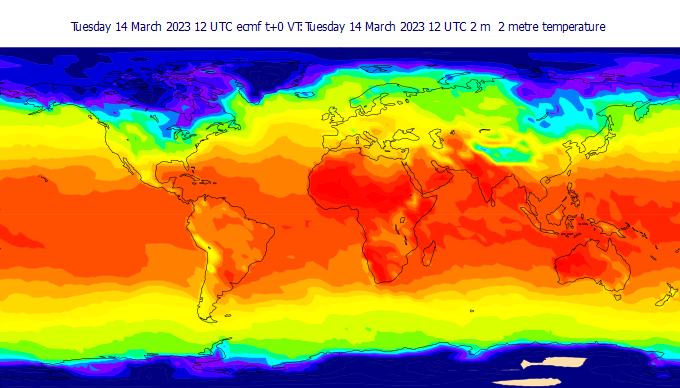

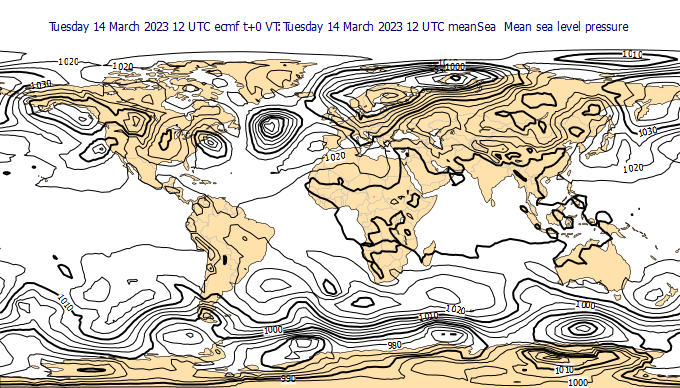

<xarray.Dataset>
Dimensions:            (time: 1, step: 1, heightAboveGround: 1, latitude: 451,
                        longitude: 900, meanSea: 1)
Coordinates:
  * time               (time) datetime64[ns] 2023-03-14T12:00:00
  * step               (step) timedelta64[ns] 00:00:00
  * heightAboveGround  (heightAboveGround) float64 2.0
  * latitude           (latitude) float64 90.0 89.6 89.2 ... -89.2 -89.6 -90.0
  * longitude          (longitude) float64 -180.0 -179.6 -179.2 ... 179.2 179.6
    valid_time         (time, step) datetime64[ns] ...
  * meanSea            (meanSea) float64 0.0
Data variables:
    t2m                (time, step, heightAboveGround, latitude, longitude) float32 ...
    msl                (time, step, meanSea, latitude, longitude) float32 ...
Attributes:
    GRIB_edition:            2
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2023-03-14T22:30 GRIB to CDM+CF via cfgrib-0.9.1...

In [4]:
source = cml.load_source(
    "ecmwf-open-data",
    param=["2t", "msl"],
)
for s in source:
    cml.plot_map(s, title=True)
source.to_xarray()

In [ ]:
source = cml.load_source(
    "mars",
    type="ofb",
    obsgroup="conv",
    time="12",
    format="odb",
    reportype=16001,
    date="2020-05-18",
)
pd = source.to_pandas()

## Dataset

A dataset is a clearly identified set of data. It has a name, can be cited, has documentation and, hopefully, somebody is maintaining it.

A dataset is an object created using cml.load_dataset(name, arg1, arg2=..., ...)

- The name is a string that uniquely identifies the dataset.
- The argument(s) arg1 and keyword argument(s) arg2 can be used to specify a subset of the dataset.
- The data can be accessed using methods such as to_xarray() or to_pandas() or other.
- Relevant metadata are attached directly to the dataset to provides additional information such as an URL, a citation, licence, etc.

### Example dataset: huriccane database

In [ ]:
atlantic = cml.load_dataset("hurricane-database", bassin="atlantic")
df = atlantic.to_pandas()

### Example dataset: part of ERA5 

In [ ]:
import climetlab as cml
ds = cml.load_dataset("era5-temperature", 
#    period=(1979, 1999), # This can be long to run.
    period=(1979, 1981),
    domain="France",
    time=12,
 )

In [ ]:
ds.to_xarray()

Once the data has been downloaded. It is cached locally. The following will not download any additional data.


In [ ]:
import climetlab as cml
ds = cml.load_dataset("era5-temperature", 
    period=1980,
    domain="France",
    time=12,
 )

If the dataset is not found, CliMetLab provides the list of available datasets:

In [ ]:
import climetlab as cml
cml.load_dataset('hurican-database-with-typo') # Fails


Additionnal datasets are defined with python plugins (via pip install), more details on this process in the "Dataset plugins" notebook.

More  examples can be found at (https://climetlab.readthedocs.io/en/latest/examples.html).

## Exercises
Find the mean temperature (2m temperature) in Italy in 1980, at 6am.


**Solutions:**

In [ ]:
import climetlab as cml
data = cml.load_dataset("era5-temperature", 
    period=1980,
    domain="Italy",
    time=6,
)
ds = data.to_xarray()
float(ds.mean().t2m)

## Own data loaders

### Download the latest and previous EC OP forecast data

#### Define some general input information

In [73]:
param_list = ["2t", "msl"]
latest_steps = list(np.arange(0,18,3))
previous_steps = latest_steps
latest_steps

[0, 3, 6, 9, 12, 15]

In [77]:
source = cml.load_source(
    "ecmwf-open-data",
    param=param_list,
    step=latest_steps)
latest_ds = source.to_xarray()

TypeError: default() missing 1 required positional argument: 'o'

In [61]:
latest_ds.valid_time.values

array([['2023-03-14T12:00:00.000000000', '2023-03-14T15:00:00.000000000']],
      dtype='datetime64[ns]')

In [45]:
latest_init_ts = latest_ds.time.values[0]
previous_init_ts = pd.Timestamp(latest_ds.time.values[0])-pd.Timedelta(hours=6)

In [54]:
previous_init_ts_str = str(previous_init_ts)

In [64]:
source = cml.load_source(
    "ecmwf-open-data",
    date =previous_init_ts_str,
    param=param_list,
    step=previous_steps,#list(np.arange(0,6,3))
    )
previous_ds = source.to_xarray()

TypeError: default() missing 1 required positional argument: 'o'

In [62]:
previous_ds.valid_time.values

array([['2023-03-14T06:00:00.000000000', '2023-03-14T09:00:00.000000000',
        '2023-03-14T12:00:00.000000000', '2023-03-14T15:00:00.000000000']],
      dtype='datetime64[ns]')